# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python
print("Python Installed")

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.9 which is incompatible.
Python Installed


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print("The default brain has been identified")

The default brain has been identified


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.1099999975413084


When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
#Define the Actor and the Critic
import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim=1./np.sqrt(fan_in)
    return(-lim,lim)

class Actor(nn.Module):
    def __init__(self,state_size,action_size,seed,fc1_units=330,fc2_units=110):
        #Initializes the actor neural network
        super(Actor,self).__init__()
        self.seed=torch.manual_seed(seed)
        self.fc1=nn.Linear(state_size,fc1_units)
        self.fc2=nn.Linear(fc1_units,fc2_units)
        self.fc3=nn.Linear(fc2_units,action_size)
        self.reset_parameters()
    def reset_parameters(self):
        #Resets network weights using a set of placeholder values
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3,3e-3)
        
    def forward(self,state):
        #Forward propogation of state input through the network
        x=F.relu(self.fc1(state))
        x=F.relu(self.fc2(x))
        return F.tanh(self.fc3(x))
    
class Critic(nn.Module):
    def __init__(self,state_size,action_size,seed,fc1_units=330,fc2_units=110):
        #Initializes the critic neural network
        super(Critic,self).__init__()
        self.seed= torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size,fc1_units)
        self.fc2 = nn.Linear(fc1_units+action_size,fc2_units)
        self.fc3 = nn.Linear(fc2_units,1)
        self.reset_parameters()
    def reset_parameters(self):
        #Resets the network parameters using placeholder values
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3,3e-3)
    def forward(self,state,action):
        #Forward propogation of state and action input through the network
        x = F.relu(self.fc1(state))
        x = torch.cat((x,action),dim=1)
        x = F.relu(self.fc2(x))
        return self.fc3(x)


print("The Actor and Critic have been created")

The Actor and Critic have been created


In [7]:
#Define the DDPG Agent

from collections import namedtuple,deque
import copy
import random
import torch.nn.functional as F
import torch
import torch.optim as optim
from matplotlib import pyplot as plt

BUFFER_SIZE=int(1e5)
BATCH_SIZE=512
GAMMA=0.99
TAU=1e-3
LR_ACTOR=1e-3
LR_CRITIC=1e-3
WEIGHT_DECAY=0
UPDATE_EVERY = 20

#Check GPU availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#Define the DDPG Agent
class DDPGAgent():
    def __init__(self,state_size,action_size,random_seed):
        #Initializes the neural network
        self.state_size=state_size
        self.action_size=action_size
        self.seed=random.seed(random_seed)
        
        #Actor Networks(A target and a local network)
        self.actor_local=Actor(state_size,action_size,random_seed).to(device)
        self.actor_target=Actor(state_size,action_size,random_seed).to(device) 
        self.actor_optimizer=optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)
        
        #Critic Networks(A target and local network)
        self.critic_local=Critic(state_size, action_size, random_seed).to(device)
        self.critic_target=Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer=optim.Adam(self.critic_local.parameters(),lr=LR_CRITIC, weight_decay = WEIGHT_DECAY)
        
        #NoiseProcess
        self.noise = OUNoise(action_size, random_seed)
        
        #Replay memory buffer
        self.memory = ReplayBuffer(action_size,BUFFER_SIZE,BATCH_SIZE,random_seed)
        #A timestep count to allow for updating the networks at intervals
        self.t_step= 0
        
    def step(self,state,action,reward,next_state,done):
        #Save the experience tuple and learn/update network if at a timestep that 
        #     is a multiple of the UPDATE_EVERY variable
        self.memory.add(state,action,reward,next_state,done)
        #Learn, if enough samples available in memory(N>batch_size)
        self.t_step = (self.t_step+1)%UPDATE_EVERY
        if self.t_step== 0:
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences,GAMMA)
                    
    def act(self,state,add_noise):
        #Use the state input to decide on an action. If in the early episodes(n_episodes<300), noise 
        #    is added to the action to encourage exploration. 
        state=torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action=self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action +=self.noise.sample()
        return np.clip(action,-1,1)
    
    def reset(self):
        #reset the noise parameter
        self.noise.reset()
        
    def learn(self,experiences,gamma):
        #Update the network by learning from a batch of experience trajectories.
        states,actions,rewards,next_states,dones=experiences
        
        #Update the Critic network
        #Get predicted next state actions and Q values from target models
        actions_next=self.actor_target(next_states)
        Q_targets_next=self.critic_target(next_states,actions_next)
        #Compute Q Targets for current state
        Q_targets = rewards+(gamma*Q_targets_next*(1-dones))
        #Compute critic loss
        Q_expected = self.critic_local(states,actions)
        critic_loss = F.mse_loss(Q_expected,Q_targets)
        #Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(),1)
        self.critic_optimizer.step()
        
        #Update the Actor network
        #Compute Actor Loss
        actions_pred=self.actor_local(states)
        actor_loss = -self.critic_local(states,actions_pred).mean()
        #Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.actor_local.parameters(),1)
        self.actor_optimizer.step()
        
        #Update Actor and Critic Target Networks
        self.soft_update(self.critic_local,self.critic_target,TAU)
        self.soft_update(self.actor_local,self.actor_target,TAU)
    
    def soft_update(self,local_model,target_model,tau):
        #Soft update the model weights
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data+(1.0-tau)*target_param.data)

class OUNoise:
    #An Ornstein-Uhlenbeck process used to add noise to selected actions to allow for exploration in the environment
    def __init__(self,size,seed,mu=0.0,theta=0.15,sigma=0.2):
        #Initializes the noise process
        self.mu=mu*np.ones(size)
        self.theta=theta
        self.sigma=sigma
        self.seed=random.seed(seed)
        self.reset()
    def reset(self):
        #Resets the noise process
        self.state=copy.copy(self.mu)
    def sample(self):
        #Calculates and produces a noise value
        x=self.state
        dx=self.theta*(self.mu-x)+self.sigma*np.array([random.random() for i in range(len(x))])
        self.state=x+dx
        return self.state


class ReplayBuffer:
    #Creates a memory buffer to store experiences to learn from
    def __init__(self,action_size,buffer_size,batch_size,seed):
        #Initializes the memory buffer
        self.action_size=action_size
        self.memory=deque(maxlen=buffer_size)
        self.batch_size=batch_size
        self.experience=namedtuple("Experience",field_names=["state","action","reward","next_state","done"])
        self.seed=random.seed(seed)
    def add(self,state,action,reward,next_state,done):
        #Add an experience trajectory to the memory buffer
        e=self.experience(state,action,reward,next_state,done)
        self.memory.append(e)
    def sample(self):
        #Sample from the buffer and return a batch of trajectories
        random.seed(2)
        experiences = random.sample(self.memory,k=self.batch_size)
        
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states=torch.from_numpy(np.vstack(e.next_state for e in experiences if e is not None)).float().to(device)
        dones=torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        return (states,actions,rewards,next_states,dones)
    def __len__(self):
        #Return the length of the memory buffer
        return len(self.memory)
        
        
print("The DDPG agent has been defined")

The DDPG agent has been defined


Episode 100	Average Score: 0.6808999847806994
Episode 200	Average Score: 1.29789997098967444
Episode 300	Average Score: 2.00319995522499183
Episode 400	Average Score: 5.5223998765647415
Episode 500	Average Score: 10.152799773067237
Episode 600	Average Score: 15.826399646252394
Episode 700	Average Score: 28.059699372816836
Episode 738	Average Score: 33.339999254792938
Environment solved in 638 episodes!	Average Score: 30.028799328804016


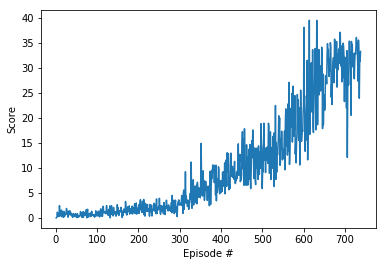

In [10]:

#Set the random seed
random_seed=2
#Create the Arm Agent 
ArmAgent = DDPGAgent(state_size=33, action_size=4,random_seed=2)


#Define the DDPG algorithm to train the agent
def ddpg(n_episodes=1500,max_t=1200,print_every=100):
    scores_deque = deque(maxlen=print_every)
    scoreList=[]    
    for i_episode in range(1,n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        ArmAgent.reset()
        scores=np.zeros(num_agents)
        for t in range(max_t):
            #If the episode number is less than 300, add noise to explore environment
            if i_episode < 300:
                action = ArmAgent.act(states, True)
            else:
                action = ArmAgent.act(states,False)
            env_info = env.step(action)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            ArmAgent.step(states,action,rewards,next_states,dones)
            scores += env_info.rewards
            states = next_states
            if np.any(dones):
                break
        scores_deque.append(np.mean(scores))    
        scoreList.append(np.mean(scores))
        print('\rEpisode {}\tAverage Score: {}'.format(i_episode,np.mean(scores)),end="")
        if i_episode %print_every ==0:
            print('\rEpisode {}\tAverage Score: {}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=30:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {}'.format(i_episode-100,np.mean(scores_deque)))
            torch.save(ArmAgent.actor_local.state_dict(), 'continuousControlcheckpoint_actor_local.pth')
            torch.save(ArmAgent.actor_target.state_dict(),'continuousControlcheckpoint_actor_target.pth')
            torch.save(ArmAgent.critic_local.state_dict(), 'continuousControlcheckpoint_critic_local.pth')
            torch.save(ArmAgent.critic_target.state_dict(), 'continuousControlcheckpoint_critic_target.pth')
            break
            
            
            
            
            
            
            
        
    return scoreList

scoreList = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scoreList)+1), scoreList)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
            
